# Clase 7: pandas (II)

- Merge, join, concatenate and compare
- Missing data
- Group by
- Graficar utilizando pandas

In [1]:
import pandas as pd
import numpy as np

In [2]:
df1 = pd.DataFrame({'A':['A0','A1','A2','A3'],
                    'B':['B0','B1','B2','B3'],
                    'C':['C0','C1','C2','C3'],
                    'D':['D0','D1','D2','D3']},
                   index=[0,1,2,3])

df2 = pd.DataFrame({'A':['A4','A5','A6','A7'],
                    'B':['B4','B5','B6','B7'],
                    'C':['C4','C5','C6','C7'],
                    'D':['D4','D5','D6','D7']},
                   index=[0,1,2,3])

df3 = pd.DataFrame({'A':['A8','A9','A10','A11'],
                    'B':['B8','B9','B10','B11'],
                    'C':['C8','C9','C10','C11'],
                    'D':['D8','D9','D10','D11']},
                   index=[0,1,2,3])

In [3]:
df1

,A,B,C,D
0,A0,B0,C0,D0
1,A1,B1,C1,D1
2,A2,B2,C2,D2
3,A3,B3,C3,D3


In [4]:
df2

,A,B,C,D
0,A4,B4,C4,D4
1,A5,B5,C5,D5
2,A6,B6,C6,D6
3,A7,B7,C7,D7


In [5]:
df3

,A,B,C,D
0,A8,B8,C8,D8
1,A9,B9,C9,D9
2,A10,B10,C10,D10
3,A11,B11,C11,D11


In [6]:
frames = [df1, df2, df3]
concatenados = pd.concat(frames)

In [7]:
concatenados

,A,B,C,D
0,A0,B0,C0,D0
1,A1,B1,C1,D1
2,A2,B2,C2,D2
3,A3,B3,C3,D3
0,A4,B4,C4,D4
1,A5,B5,C5,D5
2,A6,B6,C6,D6
3,A7,B7,C7,D7
0,A8,B8,C8,D8
1,A9,B9,C9,D9


El método `concat` tiene o recibe los siguientes parámetros:

`objs`: dataframes a concatenar

`axis`: eje que puede ser 0 (filas) o puede ser 1 (columnas)

`join`: método para concatenar, por defecto es `outer` (unión), pero puede ser también  `inner` (intersección)

`ignore_index`: es un booleano que por defecto es `False`. Si se cambia a `True`, reinicia el index

`keys`: construye un índice jerárquico para cada dataframe

Además de estos se pueden incluir varios más. No obstante, por el momento estos van a ser los más utilizados. Puede consultarse la documentación oficial [Pandas](https://pandas.pydata.org/docs/pandas.pdf)

In [8]:
pd.concat(frames, axis=1)

,A,B,C,D,A,B,C,D,A,B,C,D
0,A0,B0,C0,D0,A4,B4,C4,D4,A8,B8,C8,D8
1,A1,B1,C1,D1,A5,B5,C5,D5,A9,B9,C9,D9
2,A2,B2,C2,D2,A6,B6,C6,D6,A10,B10,C10,D10
3,A3,B3,C3,D3,A7,B7,C7,D7,A11,B11,C11,D11


In [9]:
pd.concat(frames, ignore_index=True)

,A,B,C,D
0,A0,B0,C0,D0
1,A1,B1,C1,D1
2,A2,B2,C2,D2
3,A3,B3,C3,D3
4,A4,B4,C4,D4
5,A5,B5,C5,D5
6,A6,B6,C6,D6
7,A7,B7,C7,D7
8,A8,B8,C8,D8
9,A9,B9,C9,D9


In [10]:
pd.concat(frames, keys=['df1','df2','df3'])

A    B    C    D
df1 0   A0   B0   C0   D0
    1   A1   B1   C1   D1
    2   A2   B2   C2   D2
    3   A3   B3   C3   D3
df2 0   A4   B4   C4   D4
    1   A5   B5   C5   D5
    2   A6   B6   C6   D6
    3   A7   B7   C7   D7
df3 0   A8   B8   C8   D8
    1   A9   B9   C9   D9
    2  A10  B10  C10  D10
    3  A11  B11  C11  D11

In [15]:
df_con = pd.concat(frames, keys=['df1','df2','df3'])

In [16]:
df_con.loc['df1']

,A,B,C,D
0,A0,B0,C0,D0
1,A1,B1,C1,D1
2,A2,B2,C2,D2
3,A3,B3,C3,D3


In [17]:
df_con.loc['df1','B':'C']

,B,C
0,B0,C0
1,B1,C1
2,B2,C2
3,B3,C3


In [18]:
df_con.loc['df2']

,A,B,C,D
0,A4,B4,C4,D4
1,A5,B5,C5,D5
2,A6,B6,C6,D6
3,A7,B7,C7,D7


In [19]:
df_con.loc['df3']

,A,B,C,D
0,A8,B8,C8,D8
1,A9,B9,C9,D9
2,A10,B10,C10,D10
3,A11,B11,C11,D11


In [20]:
df_con.loc['df1':'df2',['A','C']]

A   C
df1 0  A0  C0
    1  A1  C1
    2  A2  C2
    3  A3  C3
df2 0  A4  C4
    1  A5  C5
    2  A6  C6
    3  A7  C7

## Merge

El método `merge` está basado en las bases de datos relacionales como SQL. Recibe, entre otros, los siguientes parámetros:

`left`: dataframe o serie

`right`: dataframe o serie

`how`: método para hacer el join. Puede ser `left`, `right`, `outer` o  `inner`. Por defecto, recibe el valor `inner`

`on`: columna o índice sobre la cual se va a hacer el join, si no se especifica, se inferirá a partir de los nombres de las columnas


In [21]:
left = pd.DataFrame({'key1':['K0','K0','K1','K2'],
                     'key2':['K0','K1','K0','K1'],
                     'A':['A0','A1','A2','A3'],
                     'B':['B0','B1','B2','B3']})

right = pd.DataFrame({'key1':['K0','K1','K1','K2'],
                     'key2':['K0','K0','K0','K0'],
                     'C':['C0','C1','C2','C3'],
                     'D':['D0','D1','D2','D3']})

In [22]:
left

,key1,key2,A,B
0,K0,K0,A0,B0
1,K0,K1,A1,B1
2,K1,K0,A2,B2
3,K2,K1,A3,B3


In [23]:
right

,key1,key2,C,D
0,K0,K0,C0,D0
1,K1,K0,C1,D1
2,K1,K0,C2,D2
3,K2,K0,C3,D3


In [24]:
pd.merge(left,right)

,key1,key2,A,B,C,D
0,K0,K0,A0,B0,C0,D0
1,K1,K0,A2,B2,C1,D1
2,K1,K0,A2,B2,C2,D2


In [25]:
pd.merge(left, right, on='key1')

,key1,key2_x,A,B,key2_y,C,D
0,K0,K0,A0,B0,K0,C0,D0
1,K0,K1,A1,B1,K0,C0,D0
2,K1,K0,A2,B2,K0,C1,D1
3,K1,K0,A2,B2,K0,C2,D2
4,K2,K1,A3,B3,K0,C3,D3


In [26]:
pd.merge(left, right, on='key2')

,key1_x,key2,A,B,key1_y,C,D
0,K0,K0,A0,B0,K0,C0,D0
1,K0,K0,A0,B0,K1,C1,D1
2,K0,K0,A0,B0,K1,C2,D2
3,K0,K0,A0,B0,K2,C3,D3
4,K1,K0,A2,B2,K0,C0,D0
5,K1,K0,A2,B2,K1,C1,D1
6,K1,K0,A2,B2,K1,C2,D2
7,K1,K0,A2,B2,K2,C3,D3


In [27]:
pd.merge(left, right, on=['key1','key2'])

,key1,key2,A,B,C,D
0,K0,K0,A0,B0,C0,D0
1,K1,K0,A2,B2,C1,D1
2,K1,K0,A2,B2,C2,D2


In [29]:
left

,key1,key2,A,B
0,K0,K0,A0,B0
1,K0,K1,A1,B1
2,K1,K0,A2,B2
3,K2,K1,A3,B3


In [30]:
right

,key1,key2,C,D
0,K0,K0,C0,D0
1,K1,K0,C1,D1
2,K1,K0,C2,D2
3,K2,K0,C3,D3


In [28]:
pd.merge(left, right, how='left')

,key1,key2,A,B,C,D
0,K0,K0,A0,B0,C0,D0
1,K0,K1,A1,B1,NaN,NaN
2,K1,K0,A2,B2,C1,D1
3,K1,K0,A2,B2,C2,D2
4,K2,K1,A3,B3,NaN,NaN


In [31]:
pd.merge(left, right, how='right')

,key1,key2,A,B,C,D
0,K0,K0,A0,B0,C0,D0
1,K1,K0,A2,B2,C1,D1
2,K1,K0,A2,B2,C2,D2
3,K2,K0,NaN,NaN,C3,D3


In [32]:
pd.merge(left, right, how='outer')

,key1,key2,A,B,C,D
0,K0,K0,A0,B0,C0,D0
1,K0,K1,A1,B1,NaN,NaN
2,K1,K0,A2,B2,C1,D1
3,K1,K0,A2,B2,C2,D2
4,K2,K1,A3,B3,NaN,NaN
5,K2,K0,NaN,NaN,C3,D3


Se tienen dos conjuntos $A$ y $B$

`outer`
$$A\cup B$$

`inner`
$$A \cap B$$

`left`
$$A\cup(A\cap B)$$

`right`
$$B\cup(A\cap B)$$

## Join

In [33]:
left = pd.DataFrame({'A':['A0','A1','A2'],
                     'B':['B0','B1','B2']},
                     index=['K0','K1','K2'])

right = pd.DataFrame({'C':['C0','C1','C2'],
                     'D':['D0','D1','D2']},
                     index=['K0','K2','K3'])

In [34]:
left


,A,B
K0,A0,B0
K1,A1,B1
K2,A2,B2


In [35]:
right

,C,D
K0,C0,D0
K2,C1,D1
K3,C2,D2


In [36]:
left.join(right)

,A,B,C,D
K0,A0,B0,C0,D0
K1,A1,B1,NaN,NaN
K2,A2,B2,C1,D1


In [37]:
left.join(right, how='outer')

,A,B,C,D
K0,A0,B0,C0,D0
K1,A1,B1,NaN,NaN
K2,A2,B2,C1,D1
K3,NaN,NaN,C2,D2


In [38]:
left.join(right, how='inner')

,A,B,C,D
K0,A0,B0,C0,D0
K2,A2,B2,C1,D1


In [39]:
left.join(right, on='A')

,A,B,C,D
K0,A0,B0,NaN,NaN
K1,A1,B1,NaN,NaN
K2,A2,B2,NaN,NaN


## Compare

In [40]:
df = pd.DataFrame({'col1':['a','a','b','b','a'],
                   'col2':[1,2,3,np.nan,5],
                   'col3':[1,2,3,4,5]})
                  #columns=['col1','col2','col3'])

In [41]:
df

,col1,col2,col3
0,a,1.0,1
1,a,2.0,2
2,b,3.0,3
3,b,NaN,4
4,a,5.0,5


In [42]:
df2 = df.copy()

In [44]:
df.compare(df2)

Empty DataFrame
Columns: []
Index: []

In [45]:
df.loc[0,'col1'] = 4

In [46]:
df

,col1,col2,col3
0,4,1.0,1
1,a,2.0,2
2,b,3.0,3
3,b,NaN,4
4,a,5.0,5


In [47]:
df.compare(df2)

col1      
  self other
0    4     a

## Datos faltantes

In [48]:
df = pd.DataFrame(np.random.randn(5, 3),
                  index=list('acefh'),
                  columns=['uno','dos','tres']) 

In [49]:
df

,uno,dos,tres
a,0.202258,-1.618917,-0.441102
c,-0.262860,0.100544,-0.939367
e,-0.538146,0.217389,0.818725
f,0.834057,-0.905151,1.614841
h,-0.646258,0.360423,0.566906


In [50]:
df['cuatro'] = 'bar'

In [52]:
df['cinco'] = df['uno'] > 0

In [53]:
df

,uno,dos,tres,cuatro,cinco
a,0.202258,-1.618917,-0.441102,bar,True
c,-0.262860,0.100544,-0.939367,bar,False
e,-0.538146,0.217389,0.818725,bar,False
f,0.834057,-0.905151,1.614841,bar,True
h,-0.646258,0.360423,0.566906,bar,False


In [54]:
df2 = df.reindex(list('abcdefgh'))

In [55]:
df2

,uno,dos,tres,cuatro,cinco
a,0.202258,-1.618917,-0.441102,bar,True
b,NaN,NaN,NaN,NaN,NaN
c,-0.262860,0.100544,-0.939367,bar,False
d,NaN,NaN,NaN,NaN,NaN
e,-0.538146,0.217389,0.818725,bar,False
f,0.834057,-0.905151,1.614841,bar,True
g,NaN,NaN,NaN,NaN,NaN
h,-0.646258,0.360423,0.566906,bar,False


In [56]:
df2['uno']

a    0.202258
b         NaN
c   -0.262860
d         NaN
e   -0.538146
f    0.834057
g         NaN
h   -0.646258
Name: uno, dtype: float64

In [57]:
pd.isna(df2['uno'])

a    False
b     True
c    False
d     True
e    False
f    False
g     True
h    False
Name: uno, dtype: bool

In [58]:
df2.isna()

,uno,dos,tres,cuatro,cinco
a,False,False,False,False,False
b,True,True,True,True,True
c,False,False,False,False,False
d,True,True,True,True,True
e,False,False,False,False,False
f,False,False,False,False,False
g,True,True,True,True,True
h,False,False,False,False,False


In [59]:
df2.isna().sum()

uno       3
dos       3
tres      3
cuatro    3
cinco     3
dtype: int64

In [60]:
df2.fillna(0)

,uno,dos,tres,cuatro,cinco
a,0.202258,-1.618917,-0.441102,bar,True
b,0.000000,0.000000,0.000000,0,0
c,-0.262860,0.100544,-0.939367,bar,False
d,0.000000,0.000000,0.000000,0,0
e,-0.538146,0.217389,0.818725,bar,False
f,0.834057,-0.905151,1.614841,bar,True
g,0.000000,0.000000,0.000000,0,0
h,-0.646258,0.360423,0.566906,bar,False


In [61]:
df2['uno'].fillna(df2['uno'].mean())

a    0.202258
b   -0.082190
c   -0.262860
d   -0.082190
e   -0.538146
f    0.834057
g   -0.082190
h   -0.646258
Name: uno, dtype: float64

In [62]:
df2['uno'].fillna(df2['uno'].median())

a    0.202258
b   -0.262860
c   -0.262860
d   -0.262860
e   -0.538146
f    0.834057
g   -0.262860
h   -0.646258
Name: uno, dtype: float64

In [63]:
df2.dropna()

,uno,dos,tres,cuatro,cinco
a,0.202258,-1.618917,-0.441102,bar,True
c,-0.262860,0.100544,-0.939367,bar,False
e,-0.538146,0.217389,0.818725,bar,False
f,0.834057,-0.905151,1.614841,bar,True
h,-0.646258,0.360423,0.566906,bar,False


### Interpolate

In [64]:
df = pd.DataFrame({'A':[1,2.2,np.nan,4.7,5.6,6.8],
                   'B':[0.25,np.nan,np.nan, 4,12.2,14.4]})

In [65]:
df

,A,B
0,1.0,0.25
1,2.2,NaN
2,NaN,NaN
3,4.7,4.00
4,5.6,12.20
5,6.8,14.40


In [67]:
df.interpolate()

,A,B
0,1.00,0.25
1,2.20,1.50
2,3.45,2.75
3,4.70,4.00
4,5.60,12.20
5,6.80,14.40


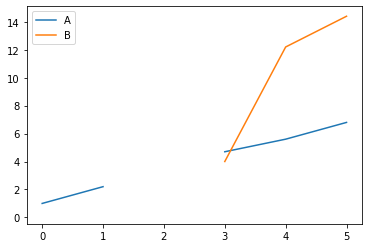

In [66]:
df.plot()

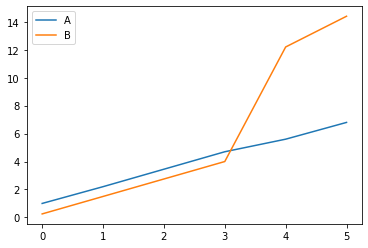

In [68]:
df.interpolate().plot() #lineal

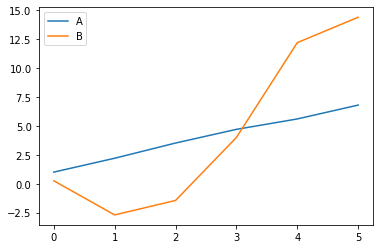

In [69]:
df.interpolate(method='quadratic').plot() #incremento a una tasa creciente

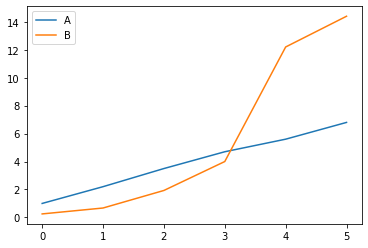

In [70]:
df.interpolate(method='pchip').plot() #función de distribución acumulada

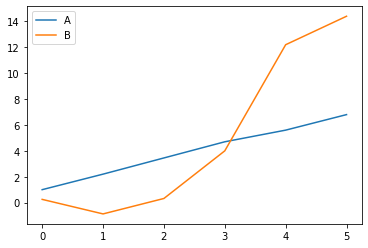

In [71]:
df.interpolate(method='akima').plot() #suavizamiento gráfico

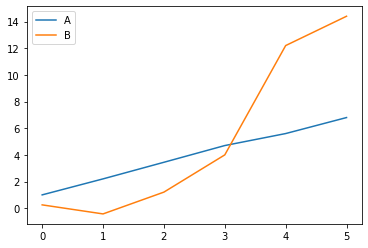

In [72]:
df.interpolate(method='spline',order=2).plot() #aproximación spline

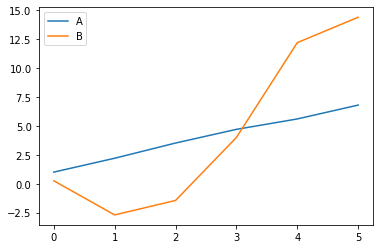

In [73]:
df.interpolate(method='polynomial',order=2).plot() #aproximación polinomial

In [74]:
np.random.seed(2)
serie = pd.Series(np.arange(1,10.1,0.25 )** 2 +np.random.randn(37))

missing = np.array([4,13,15,16,17,18,20,29])

serie[missing] = np.nan

metodos = ['linear','quadratic','cubic']


In [ ]:
serie

In [76]:
df = pd.DataFrame({m:serie.interpolate(method=m) for m in metodos})

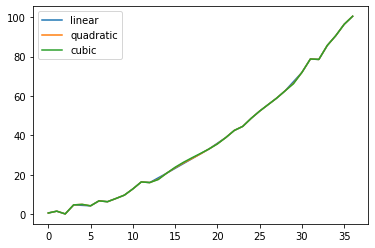

In [77]:
df.plot()

### Replace

In [78]:
df = pd.DataFrame({'a':[0,1,2,3,4],
                   'b':[5,6,7,8,9]})

In [79]:
df

,a,b
0,0,5
1,1,6
2,2,7
3,3,8
4,4,9


In [80]:
df.replace(0,4)

,a,b
0,4,5
1,1,6
2,2,7
3,3,8
4,4,9


In [81]:
df.replace({'a':0},100)

,a,b
0,100,5
1,1,6
2,2,7
3,3,8
4,4,9


In [82]:
df.replace({0:100,1:555})

,a,b
0,100,5
1,555,6
2,2,7
3,3,8
4,4,9


## Group by

In [83]:
df = pd.DataFrame({'A':['foo','bar','foo','bar','foo','bar','foo','foo'],
                   'B':['one','one','two','three','two','two','one','three'],
                   'C': np.random.randn(8),
                   'D': np.random.randn(8)})

In [84]:
df

,A,B,C,D
0,foo,one,-0.844214,-0.335677
1,bar,one,0.000010,0.611341
2,foo,two,0.542353,0.047971
3,bar,three,-0.313508,-0.829135
4,foo,two,0.771012,0.087710
5,bar,two,-1.868091,1.000366
6,foo,one,1.731185,-0.381093
7,foo,three,1.467678,-0.375669


In [96]:
df.groupby(['A','B']).sum()

C         D
A   B                        
bar one    0.000010  0.611341
    three -0.313508 -0.829135
    two   -1.868091  1.000366
foo one    0.886971 -0.716770
    three  1.467678 -0.375669
    two    1.313364  0.135681

In [86]:
df[df['A']=='foo']['C'].sum()

3.66801328294246

In [87]:
df[df['A']=='bar']['D'].sum()

0.7825713771096336

In [89]:
df.groupby('A').mean()

,C,D
A,,
bar,-0.727196,0.260857
foo,0.733603,-0.191352


In [90]:
df.groupby('A').count()

,B,C,D
A,,,
bar,3,3,3
foo,5,5,5


In [91]:
df.groupby('A').size()

A
bar    3
foo    5
dtype: int64

In [92]:
grupo_a = df.groupby('A')

In [93]:
grupo_a

In [94]:
grupo_a.describe().T

A             bar       foo
C count  3.000000  5.000000
  mean  -0.727196  0.733603
  std    1.000402  1.007660
  min   -1.868091 -0.844214
  25%   -1.090799  0.542353
  50%   -0.313508  0.771012
  75%   -0.156749  1.467678
  max    0.000010  1.731185
D count  3.000000  5.000000
  mean   0.260857 -0.191352
  std    0.963793  0.237674
  min   -0.829135 -0.381093
  25%   -0.108897 -0.375669
  50%    0.611341 -0.335677
  75%    0.805853  0.047971
  max    1.000366  0.087710

## Plotting

In [97]:
st = pd.Series(np.random.randn(1000),index=pd.date_range('1/1/2000',periods=1000))

In [98]:
st

2000-01-01   -0.074471
2000-01-02    0.433496
2000-01-03    1.278379
2000-01-04   -0.634679
2000-01-05    0.508396
                ...   
2002-09-22    0.471300
2002-09-23   -0.794150
2002-09-24   -0.568612
2002-09-25   -1.643543
2002-09-26   -0.446904
Freq: D, Length: 1000, dtype: float64

In [99]:
st = st.cumsum()

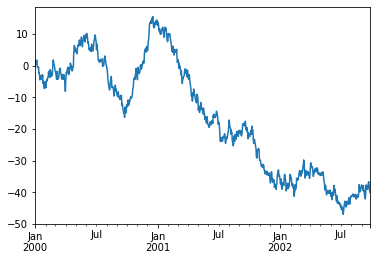

In [100]:
st.plot()

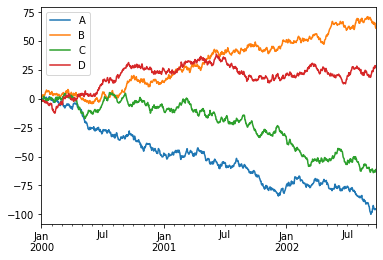

In [101]:
df = pd.DataFrame(np.random.randn(1000,4),
                  index=st.index,
                  columns=list('ABCD'))

df = df.cumsum()

df.plot()

In [102]:
df

,A,B,C,D
2000-01-01,-0.590225,1.363825,-1.552758,-1.580070
2000-01-02,-0.415941,1.934859,-2.113756,-1.404929
2000-01-03,0.230409,2.651740,-1.765476,-0.883973
2000-01-04,-1.321051,3.430106,-1.642793,-1.720905
2000-01-05,-1.728507,3.124037,-2.201926,-1.900642
...,...,...,...,...
2002-09-22,-95.996414,65.552849,-62.555578,28.703410
2002-09-23,-95.168330,63.197030,-62.358678,28.687803
2002-09-24,-95.711541,61.654169,-61.173555,27.300392
2002-09-25,-95.628961,60.920885,-63.398844,28.473766


Hay distintos tipos de gráficos soportados por `pandas`

`bar`

`hist`

`box`

`kde`

`area`

`scatter`

`hexbin`

`pie`


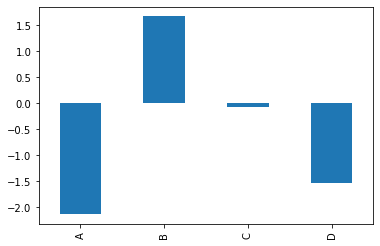

In [103]:
df.iloc[5].plot(kind='bar')

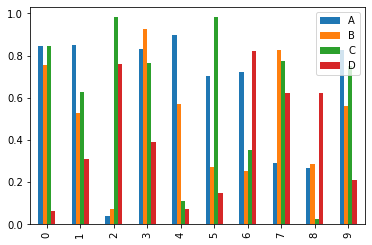

In [104]:
df = pd.DataFrame(np.random.rand(10,4),
                  columns=list('ABCD'))

df.plot.bar()

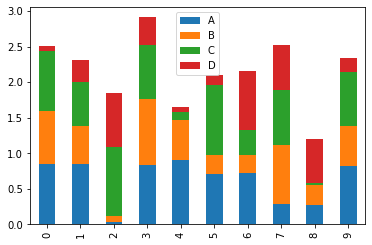

In [105]:
df.plot.bar(stacked=True)

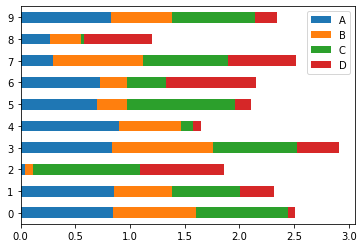

In [106]:
df.plot.barh(stacked=True)

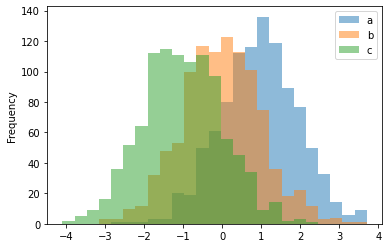

In [107]:
df2 = pd.DataFrame({'a':np.random.randn(1000)+1,
                    'b':np.random.randn(1000),
                    'c':np.random.randn(1000)-1},
                   columns=list('abc'))

df2.plot.hist(alpha=0.5,bins=25)

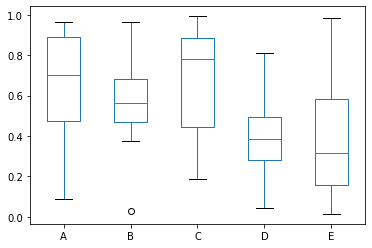

In [108]:
df = pd.DataFrame(np.random.rand(10,5), columns=list('ABCDE'))

df.plot.box()

In [109]:
color = {'boxes':'DarkGreen',
         'whiskers':'DarkOrange',
         'medians':'DarkBlue',
         'caps':'Gray'}

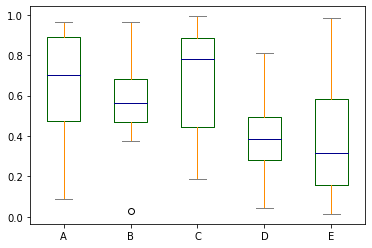

In [110]:
df.plot.box(color=color)

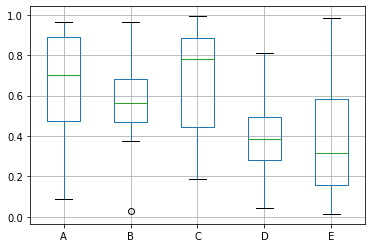

In [111]:
df.boxplot()

In [112]:
df = pd.DataFrame(np.random.rand(10,4), columns=list('abcd'))

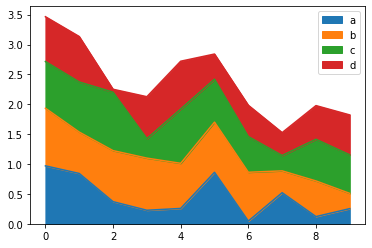

In [113]:
df.plot.area()

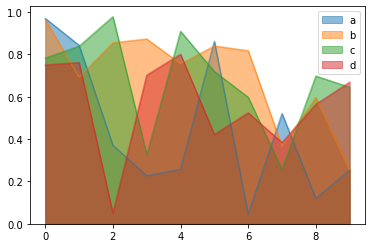

In [114]:
df.plot.area(stacked=False)

In [115]:
df = pd.DataFrame(np.random.rand(50,4), columns=list('abcd'))

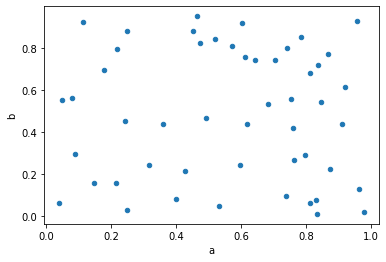

In [116]:
df.plot.scatter(x='a',y='b')

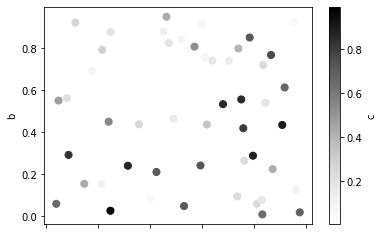

In [117]:
df.plot.scatter(x='a',y='b',c='c',s=50)

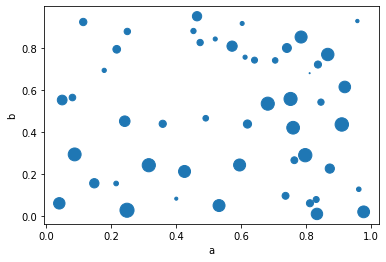

In [118]:
df.plot.scatter(x='a',y='b',s=df['c']*200)

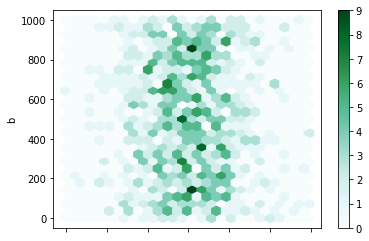

In [119]:
df = pd.DataFrame(np.random.randn(1000,2), columns=list('ab'))

df['b'] = df['b'] + np.arange(1000)

df.plot.hexbin(x='a',y='b',gridsize=25)

In [120]:
series = pd.Series(3*np.random.rand(4),index=list('abcd'),name='series')

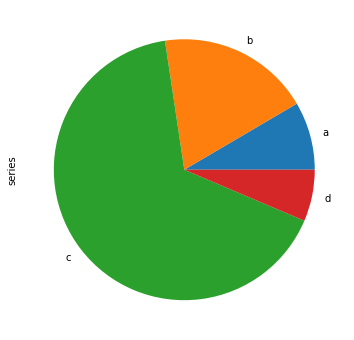

In [121]:
series.plot.pie(figsize=(6,6))

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f63427992d0>,
      dtype=object)

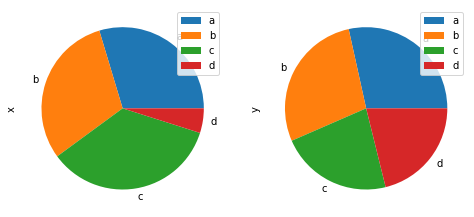

In [122]:
df = pd.DataFrame(3*np.random.rand(4,2), index=list('abcd'),
                  columns=list('xy')) 

df.plot.pie(subplots=True, figsize=(8,4))

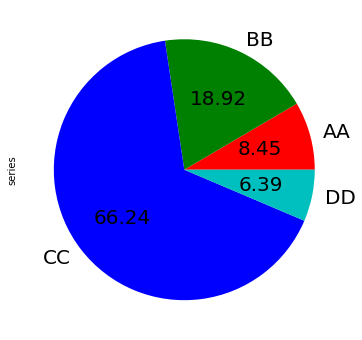

In [123]:
series.plot.pie(
    labels= ['AA','BB','CC','DD'],
    colors=['r','g','b','c'],
    autopct='%.2f',
    fontsize=20,
    figsize=(6,6)
)